In [120]:
import os
from skimage import metrics
import cv2
import numpy as np

from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

from collections import defaultdict
import shutil

## Mean Squared Error

In [2]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [3]:
image1 = cv2.imread('datasets/popup_Br_308.jpg')
image2 = cv2.imread('datasets/medium_Br_308.jpg')

In [4]:
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]), interpolation = cv2.INTER_AREA)

In [5]:
mse(image1, image2)

29089.28613033132

# Histogram similarity

In [6]:
image1 = cv2.imread('datasets/popup_Br_308.jpg')

In [7]:
hist_img1 = cv2.calcHist([image1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img1[255, 255, 255] = 0 #ignore all white pixels

In [8]:
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [9]:
image2 = cv2.imread('datasets/medium_Br_308.jpg')

In [10]:
hist_img2 = cv2.calcHist([image2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img2[255, 255, 255] = 0  #ignore all white pixels
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [11]:
metric_val = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)
print(f"Similarity Score: ", round(metric_val, 2))

Similarity Score:  0.53


## Structural Similarity Index (SSIM)

In [12]:
image1 = cv2.imread('datasets/popup_Br_308.jpg')

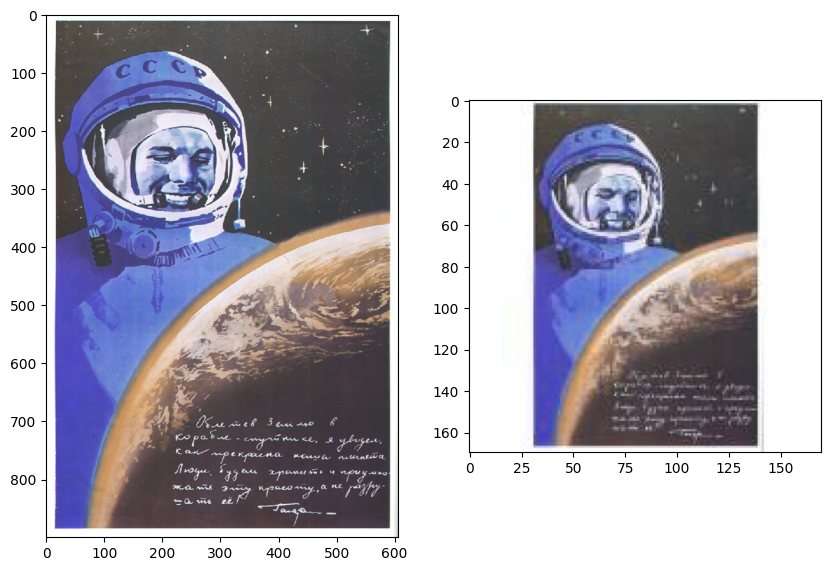

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))

ax1.imshow(image1, cmap = plt.cm.gray)
ax2.imshow(image2, cmap = plt.cm.gray)

In [14]:
image2 = cv2.imread('datasets/medium_Br_308.jpg')

In [15]:
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]), interpolation = cv2.INTER_AREA)

In [16]:
print(image1.shape, image2.shape)

(900, 607, 3) (900, 607, 3)


In [17]:
ssim(image1, image2, win_size=3)

0.4950761882759782

In [18]:
image3 = cv2.imread('datasets/kpss_mohov.jpg')

In [19]:
image3 = cv2.resize(image3, (image1.shape[1], image1.shape[0]), interpolation = cv2.INTER_AREA)

In [20]:
print(image1.shape, image3.shape)

(900, 607, 3) (900, 607, 3)


In [21]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image3_gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

In [22]:
ssim_score = metrics.structural_similarity(image1_gray, image2_gray, full=True)
print(f"SSIM Score: ", round(ssim_score[0], 2))

SSIM Score:  0.45


In [23]:
ssim_score = metrics.structural_similarity(image1_gray, image3_gray, full=True)
print(f"SSIM Score: ", round(ssim_score[0], 2))

SSIM Score:  0.3


## Dense Vector Representations

https://stackoverflow.com/questions/11541154/checking-images-for-similarity-with-opencv

In [24]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import os

c:\Users\jales\anaconda3\envs\cccp_projects\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
# Load the OpenAI CLIP Model
print('Loading CLIP Model...')
model = SentenceTransformer('clip-ViT-B-32')

Loading CLIP Model...


In [26]:
image_names = list(glob.glob('C:/Users/jales/Downloads/pics/*'))
image_names

['C:/Users/jales/Downloads/pics\\%281%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2810%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2813%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2817%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2818%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2819%29.jpg',
 'C:/Users/jales/Downloads/pics\\%282%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2820%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2821%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2823%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2824%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2826%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2827%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2828%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2829%29.jpg',
 'C:/Users/jales/Downloads/pics\\%283%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2831%29.jpg',
 'C:/Users/jales/Downloads/pics\\%285%29.jpg',
 'C:/Users/jales/Downloads/pics\\%287%29.jpg',
 'C:/Users/jales/Downloads/pics\\%288%29.jpg',
 'C:/Users/jales/Downloads/pics\\%289%29.jpg',

In [27]:
img = Image.open('C:/Users/jales/Downloads/pics\\%281%29.jpg')

In [28]:
img._size[0] * img._size[1] > 173426400

False

In [29]:
# Next we compute the embeddings
# To encode an image, you can use the following code:
# from PIL import Image
# encoded_image = model.encode(Image.open(filepath))
image_names = list(glob.glob('C:/Users/jales/Downloads/pics/*.jpg'))
print("Images:", len(image_names))
encoded_image = model.encode([Image.open(filepath) for filepath in image_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)

Images: 984


c:\Users\jales\anaconda3\envs\cccp_projects\lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (173426400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\jales\anaconda3\envs\cccp_projects\lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (174895200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\jales\anaconda3\envs\cccp_projects\lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (174603600 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\jales\anaconda3\envs\cccp_projects\lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (174106800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Batches: 100%|██████████| 8/8 [02:55<00:00, 21.94s/it]


In [38]:
# Now we run the clustering algorithm. This function compares images aganist 
# all other images and returns a list with the pairs that have the highest 
# cosine similarity score
processed_images = util.paraphrase_mining_embeddings(encoded_image)
NUM_SIMILAR_IMAGES = 100

In [109]:
# =================
# NEAR DUPLICATES
# =================
print('Finding near duplicate images...')
# Use a threshold parameter to identify two images as similar. By setting the threshold lower, 
# you will get larger clusters which have less similar images in it. Threshold 0 - 1.00
# A threshold of 1.00 means the two images are exactly the same. Since we are finding near 
# duplicate images, we can set it at 0.99 or any number 0 < X < 1.00.
threshold = 0.90
near_duplicates = [image for image in processed_images if image[0] > threshold]

Finding near duplicate images...


In [122]:
near_duplicates

[[0.9981683492660522, 44, 804],
 [0.9891569018363953, 44, 45],
 [0.9864649772644043, 37, 976],
 [0.9848965406417847, 45, 804],
 [0.9792672395706177, 3, 895],
 [0.9783816933631897, 52, 763],
 [0.967072606086731, 182, 644],
 [0.9669891595840454, 249, 777],
 [0.9668173789978027, 41, 780],
 [0.9661064743995667, 55, 735],
 [0.9605892896652222, 268, 949],
 [0.9598821401596069, 772, 941],
 [0.9555590152740479, 47, 816],
 [0.955280065536499, 578, 731],
 [0.9522665739059448, 668, 741],
 [0.9497537612915039, 579, 761],
 [0.94953453540802, 535, 681],
 [0.9477376937866211, 57, 64],
 [0.941092848777771, 389, 956],
 [0.940240204334259, 56, 241],
 [0.936234712600708, 54, 358],
 [0.9303354024887085, 224, 735],
 [0.9275925159454346, 48, 833],
 [0.9250786304473877, 525, 939],
 [0.9232856631278992, 459, 939],
 [0.9226405620574951, 64, 143],
 [0.9210860729217529, 325, 557],
 [0.9203133583068848, 64, 224],
 [0.9199763536453247, 143, 224],
 [0.9197996258735657, 64, 735],
 [0.9195613265037537, 143, 735],
 [0

In [106]:
near_duplicates

[[0.9981683492660522, 44, 804],
 [0.9891569018363953, 44, 45],
 [0.9864649772644043, 37, 976],
 [0.9848965406417847, 45, 804],
 [0.9792672395706177, 3, 895],
 [0.9783816933631897, 52, 763],
 [0.967072606086731, 182, 644],
 [0.9669891595840454, 249, 777],
 [0.9668173789978027, 41, 780],
 [0.9661064743995667, 55, 735],
 [0.9605892896652222, 268, 949],
 [0.9598821401596069, 772, 941],
 [0.9555590152740479, 47, 816],
 [0.955280065536499, 578, 731],
 [0.9522665739059448, 668, 741],
 [0.9497537612915039, 579, 761],
 [0.94953453540802, 535, 681],
 [0.9477376937866211, 57, 64],
 [0.941092848777771, 389, 956],
 [0.940240204334259, 56, 241],
 [0.936234712600708, 54, 358],
 [0.9303354024887085, 224, 735],
 [0.9275925159454346, 48, 833],
 [0.9250786304473877, 525, 939],
 [0.9232856631278992, 459, 939],
 [0.9226405620574951, 64, 143],
 [0.9210860729217529, 325, 557],
 [0.9203133583068848, 64, 224],
 [0.9199763536453247, 143, 224],
 [0.9197996258735657, 64, 735],
 [0.9195613265037537, 143, 735],
 [0

In [107]:
image_names[224]

'C:/Users/jales/Downloads/pics\\ksssrpost_0043.jpg'

In [108]:
image_names[577]

'C:/Users/jales/Downloads/pics\\popup_Le_064.jpg'

In [96]:
d = defaultdict(lambda: -1)

In [97]:
counter = 0

In [ ]:
os.mkdir()

In [117]:
image_names

['C:/Users/jales/Downloads/pics\\%281%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2810%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2813%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2817%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2818%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2819%29.jpg',
 'C:/Users/jales/Downloads/pics\\%282%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2820%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2821%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2823%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2824%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2826%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2827%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2828%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2829%29.jpg',
 'C:/Users/jales/Downloads/pics\\%283%29.jpg',
 'C:/Users/jales/Downloads/pics\\%2831%29.jpg',
 'C:/Users/jales/Downloads/pics\\%285%29.jpg',
 'C:/Users/jales/Downloads/pics\\%287%29.jpg',
 'C:/Users/jales/Downloads/pics\\%288%29.jpg',
 'C:/Users/jales/Downloads/pics\\%289%29.jpg',

In [115]:
near_duplicates

[[0.9981683492660522, 44, 804],
 [0.9891569018363953, 44, 45],
 [0.9864649772644043, 37, 976],
 [0.9848965406417847, 45, 804],
 [0.9792672395706177, 3, 895],
 [0.9783816933631897, 52, 763],
 [0.967072606086731, 182, 644],
 [0.9669891595840454, 249, 777],
 [0.9668173789978027, 41, 780],
 [0.9661064743995667, 55, 735],
 [0.9605892896652222, 268, 949],
 [0.9598821401596069, 772, 941],
 [0.9555590152740479, 47, 816],
 [0.955280065536499, 578, 731],
 [0.9522665739059448, 668, 741],
 [0.9497537612915039, 579, 761],
 [0.94953453540802, 535, 681],
 [0.9477376937866211, 57, 64],
 [0.941092848777771, 389, 956],
 [0.940240204334259, 56, 241],
 [0.936234712600708, 54, 358],
 [0.9303354024887085, 224, 735],
 [0.9275925159454346, 48, 833],
 [0.9250786304473877, 525, 939],
 [0.9232856631278992, 459, 939],
 [0.9226405620574951, 64, 143],
 [0.9210860729217529, 325, 557],
 [0.9203133583068848, 64, 224],
 [0.9199763536453247, 143, 224],
 [0.9197996258735657, 64, 735],
 [0.9195613265037537, 143, 735],
 [0

In [118]:
image_names[54]

'C:/Users/jales/Downloads/pics\\676.jpg'

In [123]:
for (_, ref, match) in near_duplicates:

    folder = d[ref] if ref in d else d[match]

    ref_path = image_names[ref]
    match_path = image_names[match]

    if folder == -1:
        folder = counter + 1
        counter += 1
    
    folder_path = os.path.join('C:/Users/jales/Downloads/picas/', str(folder))
    
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)

    ref_out_path = ref_path.replace('C:/Users/jales/Downloads/pics', folder_path)

    match_out_path = match_path.replace('C:/Users/jales/Downloads/pics', folder_path)

    try:
        shutil.move(ref_path, ref_out_path)
        os.remove(ref_path)
    except:
        print(f'Imagem REF {ref} já movida!')
        pass

    try:
        shutil.move(match_path, match_out_path)
        os.remove(match_path)
    except:
        print(f'Imagem MATCH {match} já movida!')
        pass
    

Imagem REF 44 já movida!
Imagem MATCH 804 já movida!
Imagem REF 44 já movida!
Imagem MATCH 45 já movida!
Imagem REF 37 já movida!
Imagem MATCH 976 já movida!
Imagem REF 45 já movida!
Imagem MATCH 804 já movida!
Imagem REF 3 já movida!
Imagem MATCH 895 já movida!
Imagem REF 52 já movida!
Imagem MATCH 763 já movida!
Imagem REF 182 já movida!
Imagem MATCH 644 já movida!
Imagem REF 249 já movida!
Imagem MATCH 777 já movida!
Imagem REF 41 já movida!
Imagem MATCH 780 já movida!
Imagem REF 55 já movida!
Imagem MATCH 735 já movida!
Imagem REF 268 já movida!
Imagem MATCH 949 já movida!
Imagem REF 772 já movida!
Imagem MATCH 941 já movida!
Imagem REF 47 já movida!
Imagem MATCH 816 já movida!
Imagem REF 578 já movida!
Imagem MATCH 731 já movida!
Imagem REF 668 já movida!
Imagem MATCH 741 já movida!
Imagem REF 579 já movida!
Imagem MATCH 761 já movida!
Imagem REF 535 já movida!
Imagem MATCH 681 já movida!
Imagem REF 57 já movida!
Imagem MATCH 64 já movida!
Imagem REF 389 já movida!
Imagem MATCH 95

In [116]:
d

defaultdict(<function __main__.<lambda>()>,
            {804: 1,
             44: 1,
             45: 1,
             976: 2,
             37: 2,
             895: 3,
             3: 3,
             763: 4,
             52: 4,
             644: 5,
             182: 5,
             777: 6,
             249: 6,
             780: 7,
             41: 7,
             735: 16,
             55: 8,
             949: 9,
             268: 9,
             941: 10,
             772: 10,
             816: 11,
             47: 11,
             731: 12,
             578: 12,
             741: 13,
             668: 13,
             761: 14,
             579: 14,
             681: 15,
             535: 15,
             64: 8,
             57: 16,
             956: 17,
             389: 17,
             241: 18,
             56: 18,
             358: 19,
             54: 19,
             224: 16,
             833: 20,
             48: 20,
             939: 21,
             525: 21,
             459: 21,

In [84]:
near_duplicates

[[0.9981683492660522, 44, 804],
 [0.9891569018363953, 44, 45],
 [0.9864649772644043, 37, 976],
 [0.9848965406417847, 45, 804],
 [0.9792672395706177, 3, 895],
 [0.9783816933631897, 52, 763],
 [0.967072606086731, 182, 644],
 [0.9669891595840454, 249, 777],
 [0.9668173789978027, 41, 780],
 [0.9661064743995667, 55, 735],
 [0.9605892896652222, 268, 949],
 [0.9598821401596069, 772, 941],
 [0.9555590152740479, 47, 816],
 [0.955280065536499, 578, 731],
 [0.9522665739059448, 668, 741],
 [0.9497537612915039, 579, 761],
 [0.94953453540802, 535, 681],
 [0.9477376937866211, 57, 64],
 [0.941092848777771, 389, 956],
 [0.940240204334259, 56, 241],
 [0.936234712600708, 54, 358],
 [0.9303354024887085, 224, 735],
 [0.9275925159454346, 48, 833],
 [0.9250786304473877, 525, 939],
 [0.9232856631278992, 459, 939],
 [0.9226405620574951, 64, 143],
 [0.9210860729217529, 325, 557],
 [0.9203133583068848, 64, 224],
 [0.9199763536453247, 143, 224],
 [0.9197996258735657, 64, 735],
 [0.9195613265037537, 143, 735],
 [0

In [45]:
for score, image_id1, image_id2 in near_duplicates[0:NUM_SIMILAR_IMAGES]:
    print("\nScore: {:.3f}%".format(score * 100))
    print(image_names[image_id1])
    print(image_names[image_id2])


Score: 98.916%
C:/Users/jales/Downloads/pics\462.jpg
C:/Users/jales/Downloads/pics\462_1.jpg

Score: 98.646%
C:/Users/jales/Downloads/pics\4.jpg
C:/Users/jales/Downloads/pics\worksovpost_00036.jpg

Score: 98.490%
C:/Users/jales/Downloads/pics\462_1.jpg
C:/Users/jales/Downloads/pics\sovpolpost_00062.jpg

Score: 97.927%
C:/Users/jales/Downloads/pics\%2817%29.jpg
C:/Users/jales/Downloads/pics\tradesovpost_00017.jpg

Score: 97.838%
C:/Users/jales/Downloads/pics\65_12x18.jpg
C:/Users/jales/Downloads/pics\sovpolpost_00011.jpg

Score: 96.707%
C:/Users/jales/Downloads/pics\ksssrpost_0001.jpg
C:/Users/jales/Downloads/pics\popup_St_027.jpg

Score: 96.699%
C:/Users/jales/Downloads/pics\lenin.jpg
C:/Users/jales/Downloads/pics\sovpolpost_00031.jpg

Score: 96.682%
C:/Users/jales/Downloads/pics\437.jpg
C:/Users/jales/Downloads/pics\sovpolpost_00034.jpg

Score: 96.611%
C:/Users/jales/Downloads/pics\69_24_36.jpg
C:/Users/jales/Downloads/pics\sovmilpost18_50_0008.jpg

Score: 96.059%
C:/Users/jales/Down